In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

NUM_EVENTS = 500
P = 0.5

#### Chung-Lu
- p=1/2, Gamma=1, 100 Networks and 500 events
- fit function: (t/t_v)^alpha

=> we want alpha=(2-p)/2

In [2]:
def BA_func(x, a):
    return  pow(x/np.int64(x[0]), a)

def fit_trajectory(xdata, ydata):
    
    popt, pcov = curve_fit(lambda x, a: BA_func(x, a), xdata, ydata, maxfev=5000, bounds=([0], [np.inf]))
    alpha = popt[0]

    return alpha

In [3]:
df = pd.read_csv("Chung-Li_p05_g1.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,start_event
0,0,1,2,3,3,3,4,4,4,4,...,83,83,83,84,84,84,84,84,84,1
1,0,1,1,1,2,3,3,3,3,3,...,44,44,45,45,45,45,45,45,45,1
2,0,0,1,1,2,2,2,3,4,4,...,42,42,42,42,42,42,42,42,42,2
3,0,0,0,1,1,2,2,3,3,4,...,43,43,43,43,43,43,43,43,43,3
4,0,0,0,0,0,0,1,1,2,3,...,50,50,50,50,50,50,50,50,50,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25163,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,484
25164,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,490
25165,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,491
25166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,495


In [4]:
# retrieve average trajectories by starting year
avg_x = []
avg_y = []
for curr_e in range(2, NUM_EVENTS):
    sub_df = df[df["start_event"]==curr_e]
    
    x, y = [],[]
    for e in range(curr_e, NUM_EVENTS):
        if(len(sub_df)!=0):
            x.append(e)
            y.append(sub_df[str(e)].mean())
        else:
            x.append(e)
            y.append(0)
            
    avg_x.append(x)
    avg_y.append(y)

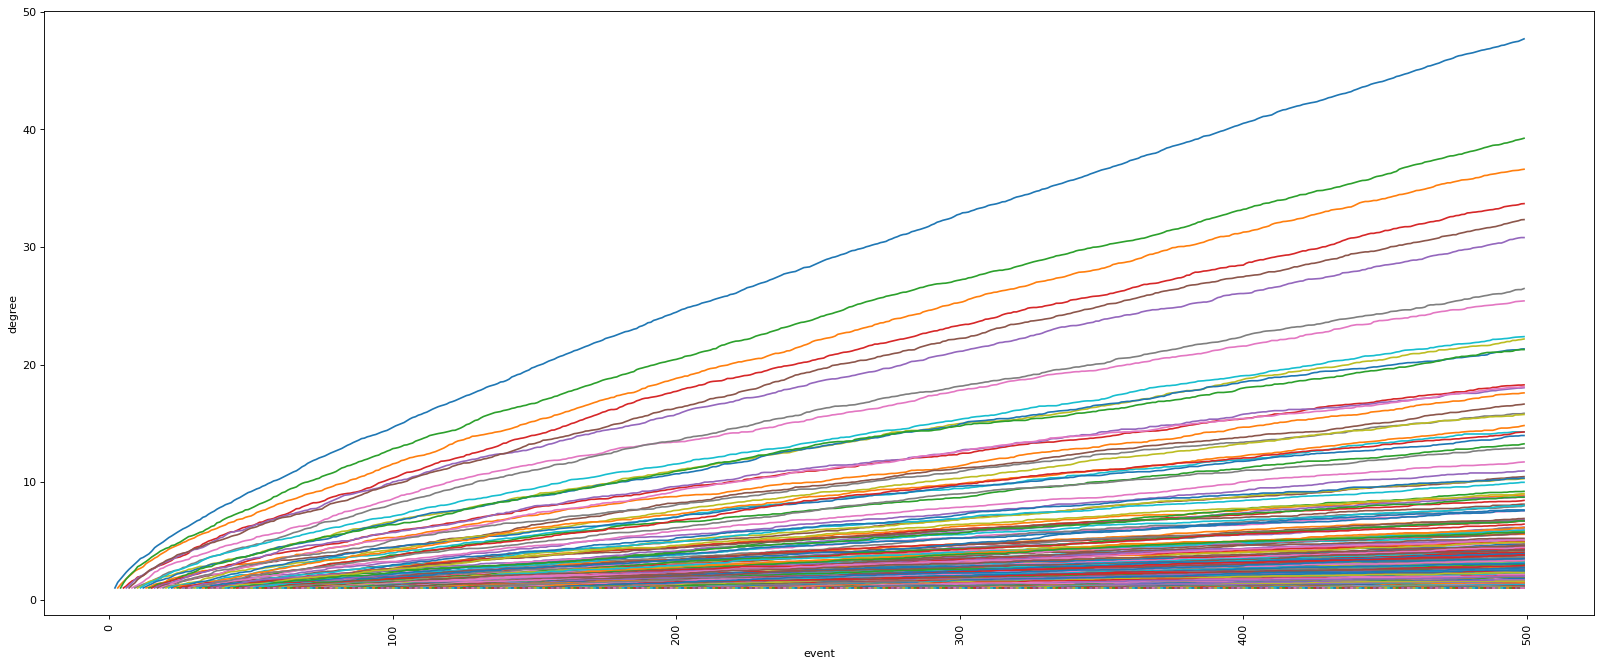

In [5]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.xlabel("event")
plt.ylabel("degree")
plt.xticks(rotation='vertical')

for x,y in zip(avg_x, avg_y):
    plt.plot(x,y)
    

plt.show()
    

In [6]:
expected_alpha = (2-P)/2

In [7]:
alphas = []
diffs = []

#print("-- event -- \t-- alpha -- \t -- alpha-1/2 --")
for curr_e in range(len(avg_x)):
    x = avg_x[curr_e]
    y = avg_y[curr_e]
    
    try:
        alpha = fit_trajectory(x, y)
        
    except:
        print(x,y)
        
        
    alpha = "%.4f" % alpha
    alphas.append(float(alpha))

    diff = "%.4f" % pow(float(alpha)-expected_alpha, 2)
    diffs.append(float(diff))
    #print(curr_e, "\t\t", alpha, "\t\t", diff )



results = pd.DataFrame({"event": range(2, NUM_EVENTS), "alpha": alphas, "diff": diffs})

results


,event,alpha,diff
0,2,0.6974,0.0028
1,3,0.7026,0.0022
2,4,0.7631,0.0002
3,5,0.7675,0.0003
4,6,0.7787,0.0008
...,...,...,...
493,495,1.2694,0.2698
494,496,0.0078,0.5509
495,497,0.0157,0.5392
496,498,0.0313,0.5165


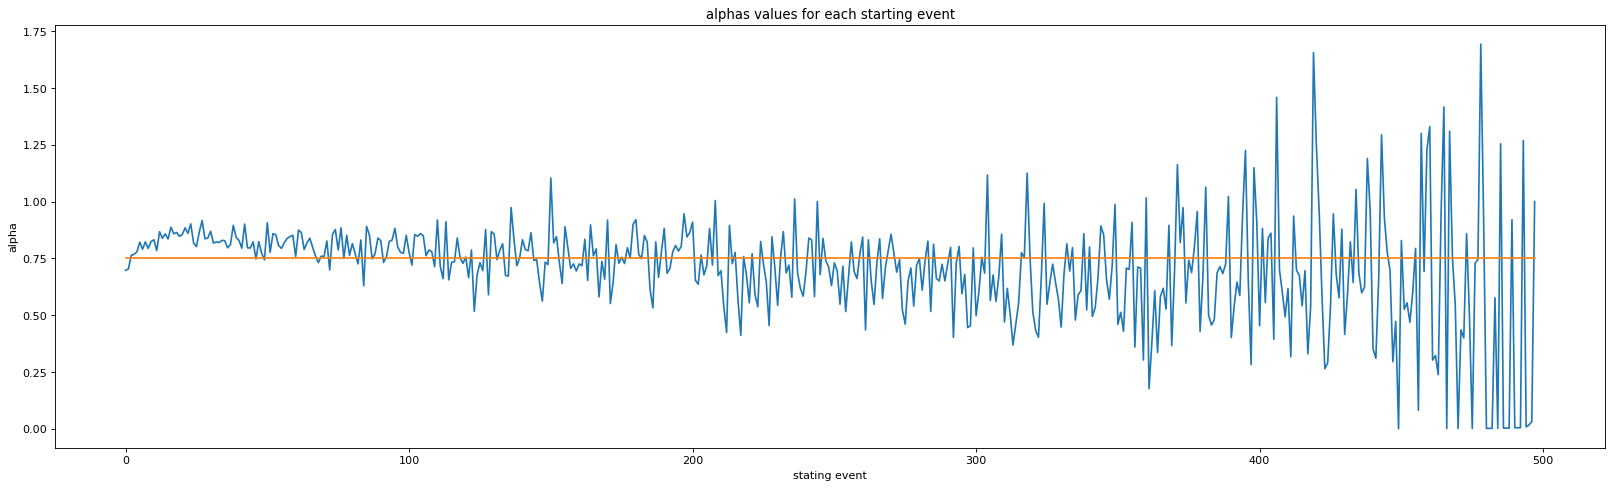

In [8]:
# plot alpha
plt.figure(figsize=(25, 7), dpi=80)
plt.title("alphas values for each starting event")
plt.xlabel("stating event")
plt.ylabel("alpha")
plt.plot([i for i in range(len(results))], results["alpha"], label="alpha")
plt.plot([i for i in range(len(results))], [expected_alpha for i in range(len(results))], label="expected alpha")
plt.show()

In [13]:
print(" -- alpha must be", expected_alpha, "--\n")

# how many alpha differ from the  expectation of the given tolerance
print("-- #alphas such that alphas)-(2-P)/2 < tolerance -- ")
tolerance = 0.0
while tolerance <= 1:
    print("tolerance =", "%.1f"%tolerance, "-> #aphas =", len(results[pow(results["diff"], 1/2) <= tolerance]))
    tolerance += 0.1

 -- alpha must be 0.75 --

-- #alphas such that alphas)-(2-P)/2 < tolerance -- 
tolerance = 0.0 -> #aphas = 21
tolerance = 0.1 -> #aphas = 253
tolerance = 0.2 -> #aphas = 372
tolerance = 0.3 -> #aphas = 426
tolerance = 0.4 -> #aphas = 452
tolerance = 0.5 -> #aphas = 467
tolerance = 0.6 -> #aphas = 476
tolerance = 0.7 -> #aphas = 478
tolerance = 0.8 -> #aphas = 496
tolerance = 0.9 -> #aphas = 496
tolerance = 1.0 -> #aphas = 498


In [10]:
results.sort_values(by="diff",  ascending=True)

,event,alpha,diff
77,79,0.7497,0.0000
302,304,0.7544,0.0000
280,282,0.7482,0.0000
175,177,0.7548,0.0000
118,120,0.7523,0.0000
...,...,...,...
475,477,0.0005,0.5618
466,468,0.0003,0.5621
449,451,0.0001,0.5624
419,421,1.6558,0.8205
